- naive-prediction-using-rd-threshold
    - x축
        - rd_threshold
    - y축
        - accuracy 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 테스트 데이터
df = pd.read_csv('/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/d-optimal/spmm-latency-traintest/train-test-csv/nonsquare-test-258-from-spmm-contain-todense-over-3s-1293.csv')

In [13]:
# 테스트 데이터를 row 단위로 읽으며, sp_smdm 과 bz_smsm 중 빠른 label 저장
real_label = []

for i in range(len(df)):
    latency_list = []
    latency_list.append(df.loc[i,'sp_smdm'])
    latency_list.append(df.loc[i,'bz_smsm'])
    real_label.append(latency_list.index(min(latency_list)))

In [17]:
# x 축에 사용 될, threshold list
rd_threshold_list = np.arange(0.01, 0.26, 0.01)
# rd_threshold_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]

# y 축에 사용 될, 각 threshold 에 따른 accuracy list
accuracy_list = []

In [18]:
# 각 threshold 를 적용했을 때의 accuracy 계산
# 입력데이터의 rd 가 threshold 보다 작다면 spark sm*dm을, 크다면 breeze sm*sm 을 추천
for rd_threshold in rd_threshold_list:
    
    # 예측 라벨 저장
    pred_label = []
    for i in range(len(df)):
        # rd가 rd_threshold보다 작으면, breeze smsm 예측
        if (df.loc[i,'rd'] <= rd_threshold):
            pred_label.append(1)
        # rd가 rd_threshold보다 크면, spark smdm 예측
        else:
            pred_label.append(0)
    
    # pred_label 과 real_label 간 분류 정확도 계산 후 저장
    accuracy_list.append(accuracy_score(real_label, pred_label))

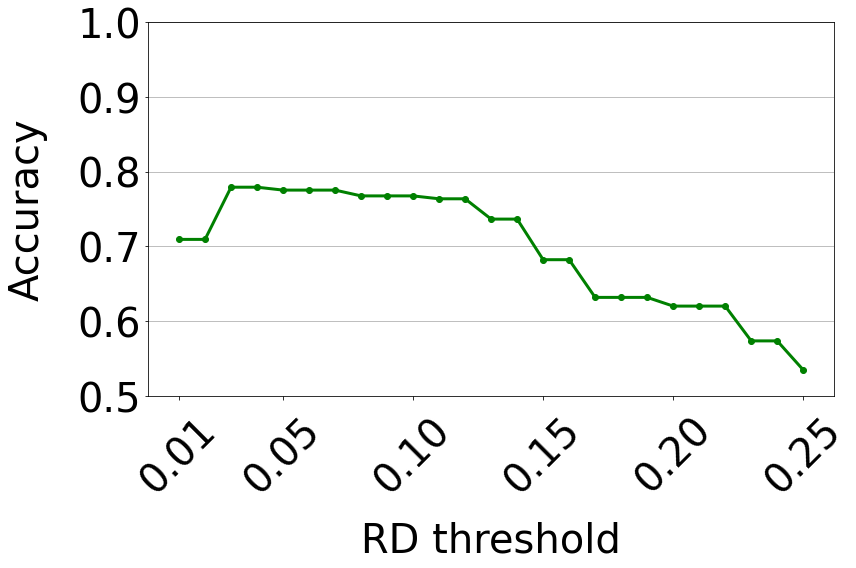

In [19]:
fontsize = 40

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

ax1.plot(rd_threshold_list, accuracy_list, color='green', marker='o', linestyle='solid', linewidth=3) 

ax1.set_xticks([0.01, 0.05, 0.1, 0.15, 0.2, 0.25])
ax1.tick_params(axis='x',pad=10, rotation=45) # x축 label pad

ax1.set_ylim([0.5, 1.0])  # y축 범위 설정
ax1.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax1.yaxis.grid(True) # y축만 grid 사용


ax1.set_xlabel("RD threshold", labelpad=20)
ax1.set_ylabel("Accuracy", labelpad=30)

fig.tight_layout()
fig.savefig('./naive-prediction-using-rd-threshold.png')
plt.show()
